In [1]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

enc = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
Y_train_binned = enc.fit_transform(Y_train)
Y_test_binned = enc.fit_transform(Y_test)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, Y_train_binned.shape, Y_test_binned.shape

((2342, 139), (586, 139), (2342, 1), (586, 1), (2342, 1), (586, 1))

# Linear SVM

In [2]:
from sklearn.preprocessing import StandardScaler

LSVM = LinearSVC(C=10000)
LSVM.fit(X_train, Y_train_binned.ravel())

y_pred_train = LSVM.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = LSVM.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 0.102
Accuracy: 0.104


C:\Users\david\py_venvs\progetto_DWM_venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Di seguito riscaliamo i dati mediante l'utilizzo di uno StandardScaler

In [3]:
# scalo i dati
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", LinearSVC(max_iter=10000))
])
svm_reg.fit(X_train, Y_train_binned.ravel())

y_pred_train = svm_reg.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = svm_reg.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 0.561
Accuracy: 0.382


C:\Users\david\py_venvs\progetto_DWM_venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Visualizziamo la matrice di confusione per capire quali istanze il nostro modello di classificazione sbaglia di più

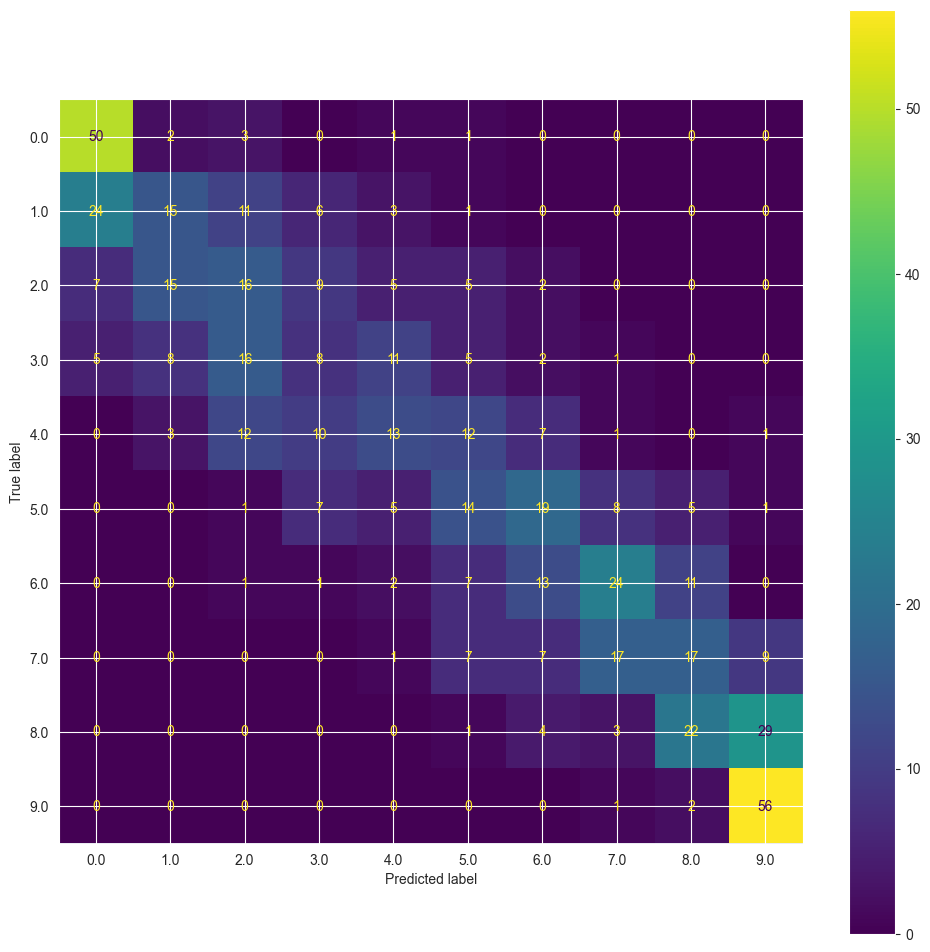

In [4]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=svm_reg,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

# SVM

In [5]:
SVM = SVC(C=100000)
SVM.fit(X_train, Y_train_binned.ravel())
y_pred = SVM.predict(X_test)

y_pred_train = SVM.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = SVM.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 0.711
Accuracy: 0.422


Visualizziamo la matrice di confusione per capire quali istanze il nostro modello di classificazione sbaglia di più

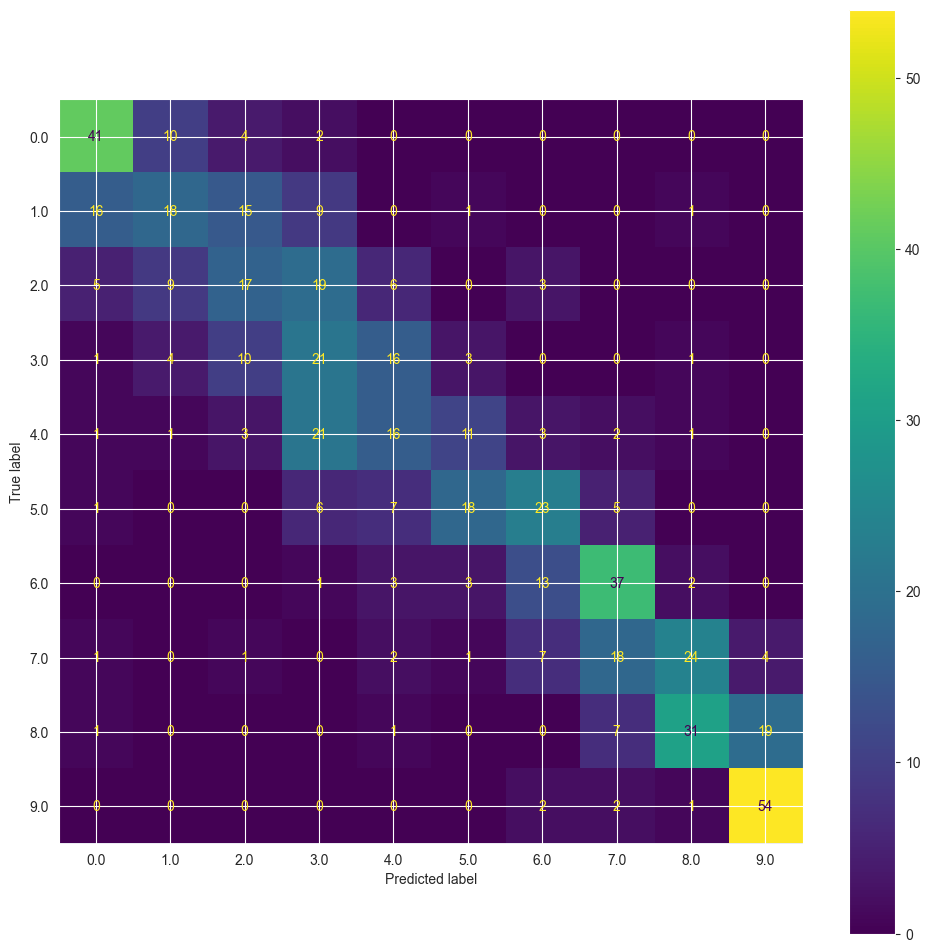

In [6]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=SVM,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

Di seguito riscaliamo i dati mediante l'utilizzo di uno StandardScaler

In [7]:
# scalo i dati
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", SVC(C=1000))
])
svm_reg.fit(X_train, Y_train_binned.ravel())

y_pred_train = svm_reg.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = svm_reg.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 1.000
Accuracy: 0.464


Visualizziamo nuovamente la matrice di confusione per capire quali istanze il nostro modello di classificazione sbaglia di più adesso e se ci sono stati dei miglioramenti rispetto a prima

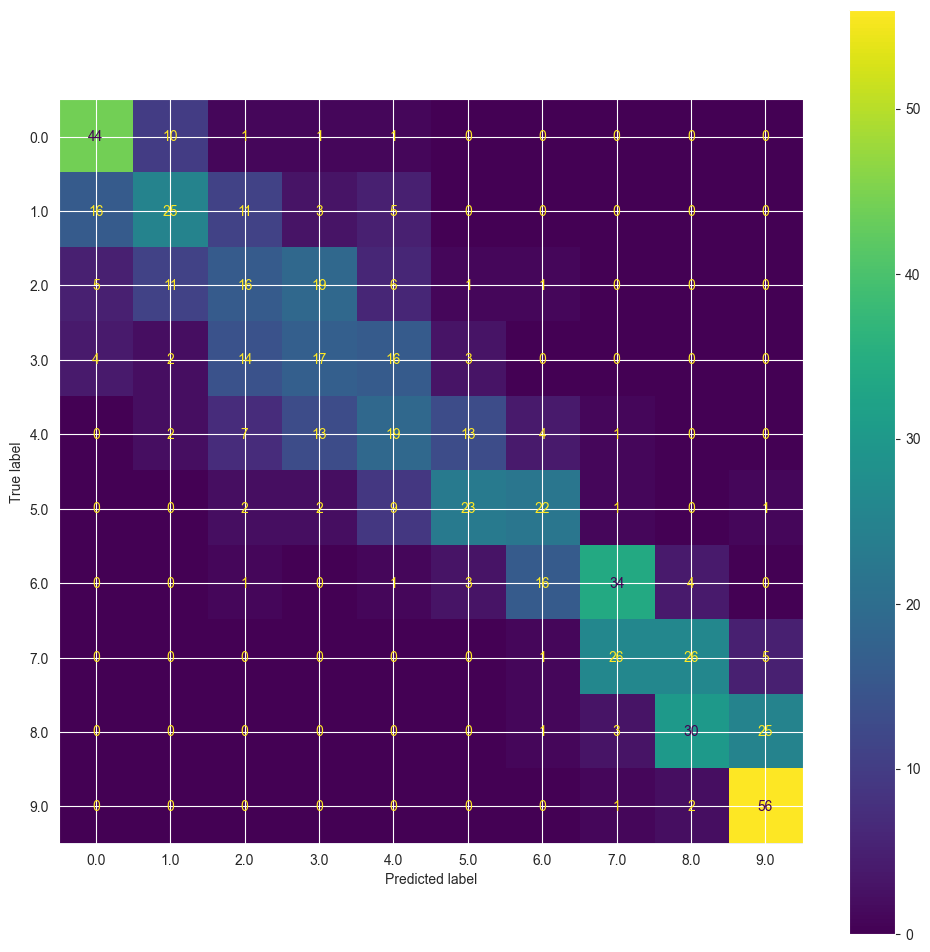

In [8]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=svm_reg,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

# Bagging
Nel tentativo di ottenere performance migliori applichiamo il metodo ensamble bagging

In [9]:
# scalo i dati e applico il Bagging
svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_regresssor", BaggingClassifier(SVC(C=1000), n_estimators=100))
])

svm_reg.fit(X_train, Y_train_binned.ravel())

y_pred_train = svm_reg.predict(X_train)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_train_binned,
                                               y_pred=y_pred_train)))

y_pred_test = svm_reg.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_true=Y_test_binned,
                                               y_pred=y_pred_test)))

Accuracy: 1.000
Accuracy: 0.483


Visualizziamo la matrice di confusione per capire quali istanze il nostro modello di classificazione sbaglia di più dopo aver apportato le suddete modifiche

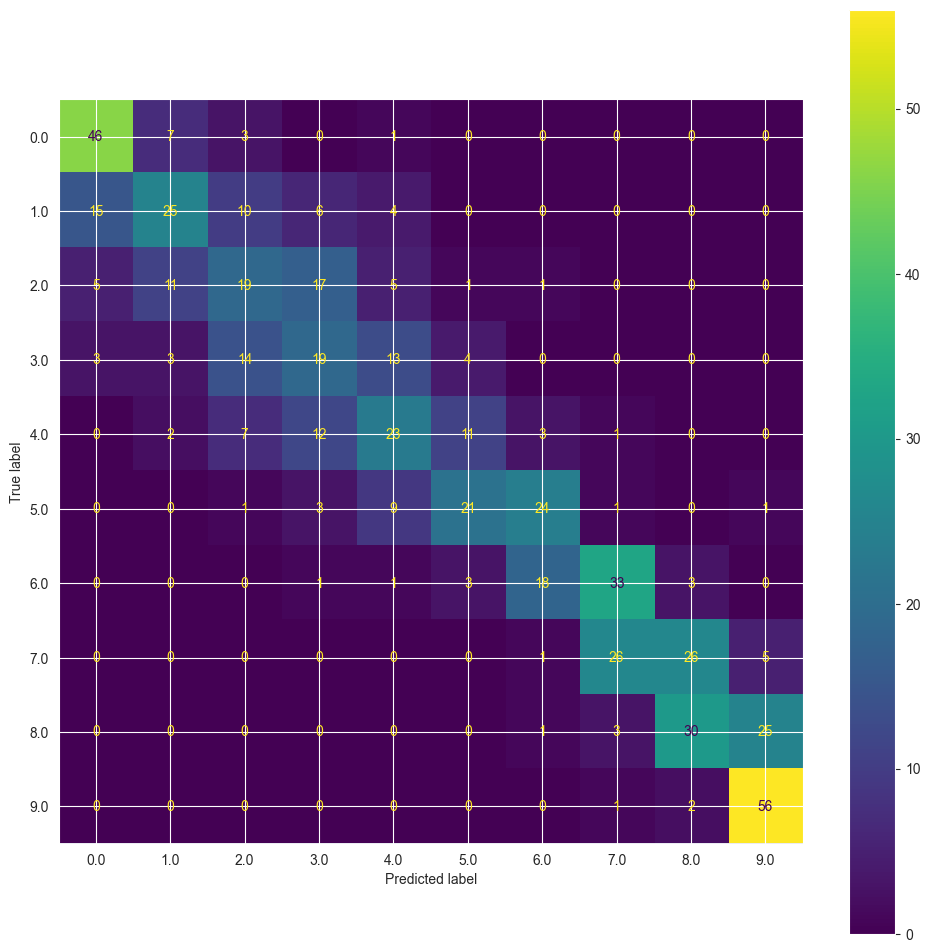

In [10]:
cm = ConfusionMatrixDisplay.from_estimator(
    estimator=svm_reg,
    X=X_test, y=Y_test_binned)
fig = cm.ax_.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)

In conclusione possiamo dire che le suddette performance non sono soddisfacenti e pertanto proseguiamo lo studio del dataset ai fini di prevedere il prezzo delle proprietà immobiliari in esso contenuto.